<h2> Demo: Time Series Analysis using Python </h2>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14

# Let's work on EURO per USD rates Dataset from Quandl

In [5]:
fx = pd.read_csv('BOE-XUDLERD.csv')
fx.head(3)

,Date,Value
0,2017-11-09,0.8603
1,2017-11-08,0.8631
2,2017-11-07,0.8639


In [6]:
fx = fx[::-1]
fx.head(3)

,Date,Value
10836,1975-01-02,0.7633
10835,1975-01-03,0.7585
10834,1975-01-06,0.7524


In [7]:
fx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10837 entries, 10836 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10837 non-null  object 
 1   Value   10837 non-null  float64
dtypes: float64(1), object(1)
memory usage: 169.5+ KB


#### Making sure Pandas reads desired columns as dates

In [8]:
fx = pd.read_csv('BOE-XUDLERD.csv', parse_dates = ['Date'], dayfirst = False)
fx = fx[::-1]
fx.head(3)

,Date,Value
10836,1975-01-02,0.7633
10835,1975-01-03,0.7585
10834,1975-01-06,0.7524


In [9]:
fx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10837 entries, 10836 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10837 non-null  datetime64[ns]
 1   Value   10837 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 169.5 KB


#### Extracting date features

In [10]:
fx['xyz'] = fx.Date.dt.hour
fx.head()

,Date,Value,xyz
10836,1975-01-02,0.7633,0
10835,1975-01-03,0.7585,0
10834,1975-01-06,0.7524,0
10833,1975-01-07,0.7510,0
10832,1975-01-08,0.7554,0


#### Making date column as index opens up additional features. Good option when dates are unique in each row.

In [11]:
fx = pd.read_csv('BOE-XUDLERD.csv', parse_dates = ['Date'], index_col='Date')
fx = fx[::-1]
fx.head(3)

,Value
Date,
1975-01-02,0.7633
1975-01-03,0.7585
1975-01-06,0.7524


In [12]:
fx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10837 entries, 1975-01-02 to 2017-11-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   10837 non-null  float64
dtypes: float64(1)
memory usage: 169.3 KB


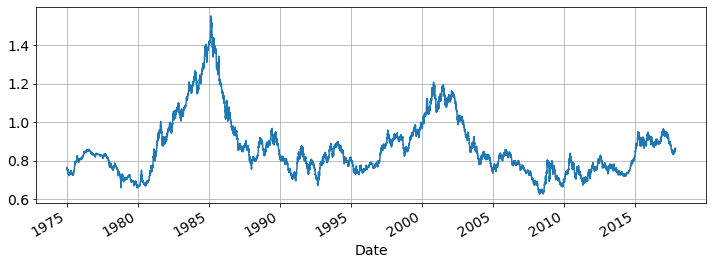

In [13]:
fx.Value.plot()
plt.show()

#### Resample - fixed period average

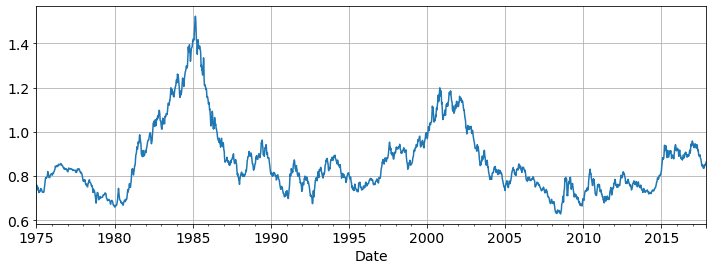

In [14]:
fxw  = fx.Value.resample('W').mean()
fxw.plot()
plt.show()

#### Rolling - Rolling period average

In [15]:
fx['roll_mean'] = fx.Value.rolling(5).mean()
fx.head(10)

,Value,roll_mean
Date,,
1975-01-02,0.7633,NaN
1975-01-03,0.7585,NaN
1975-01-06,0.7524,NaN
1975-01-07,0.7510,NaN
1975-01-08,0.7554,0.75612
1975-01-09,0.7551,0.75448
1975-01-10,0.7534,0.75346
1975-01-13,0.7540,0.75378
1975-01-14,0.7588,0.75534


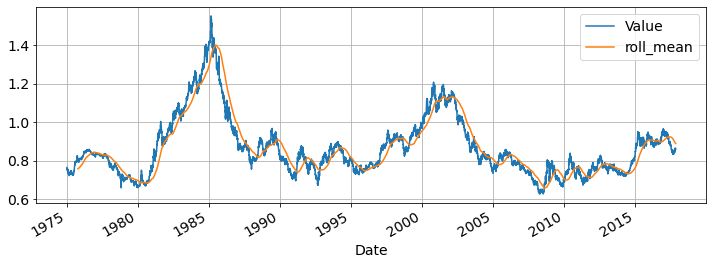

In [16]:
fx['roll_mean'] = fx.Value.rolling(200).mean()
fx.plot()
plt.show()

---
---

## Test for Stationarity - Augmented Dickey Fuller Test
* #### p - value: How likely it is to get a result like this if null hypothesis is True
* #### <font color = red> Always look at p-value in context of null hypothesis
* #### Significance value (alpha): if p- value is below this value we will reject null hypothesis, often 0.05
* #### Null hypothesis of the dickey fuller test is that the value is Non-stationary
* #### So we reject the null hypothesis that data is Non-stationary if the p values is less than 0.05

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
adfuller(fxw)[1] 

0.25413395509261294

### Remember Dickey fuller tests only Trend stationarity. So visualisation of data is not replacable.

In [19]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52).mean() 
    rolstd = timeseries.rolling(window=52).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)[1]
    print('p_value: ', dftest)

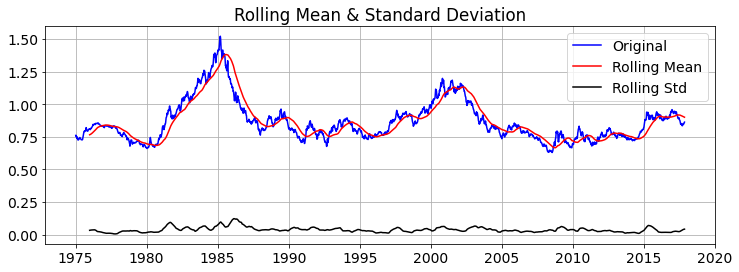

Results of Dickey-Fuller Test:
p_value:  0.25413395509261294


In [20]:
test_stationarity(fxw)

---

## Converting non stationary to stationary
* #### diff() = V(t) - V(t-1), sometimes multiple times
* #### log
* #### sqrt
* #### Proportion = V(t)/V(t-1)
* #### <font color =darkblue>Often simple solution {diff} is the best one

In [21]:
fxw.head()

Date
1975-01-05    0.76090
1975-01-12    0.75346
1975-01-19    0.75546
1975-01-26    0.74388
1975-02-02    0.73902
Freq: W-SUN, Name: Value, dtype: float64

In [22]:
fxw.diff().head()

Date
1975-01-05        NaN
1975-01-12   -0.00744
1975-01-19    0.00200
1975-01-26   -0.01158
1975-02-02   -0.00486
Freq: W-SUN, Name: Value, dtype: float64

In [23]:
fxw.diff().diff().head()

Date
1975-01-05        NaN
1975-01-12        NaN
1975-01-19    0.00944
1975-01-26   -0.01358
1975-02-02    0.00672
Freq: W-SUN, Name: Value, dtype: float64

### Lets check for Stationarity

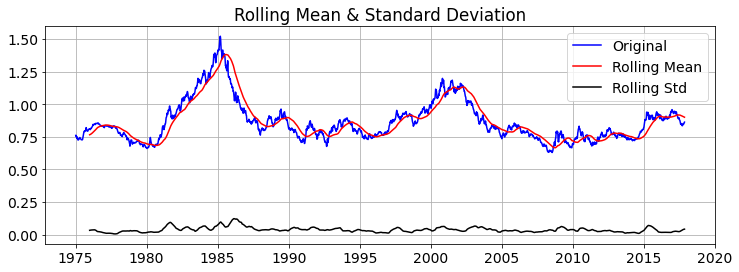

Results of Dickey-Fuller Test:
p_value:  0.25413395509261294


In [24]:
test_stationarity(fxw)

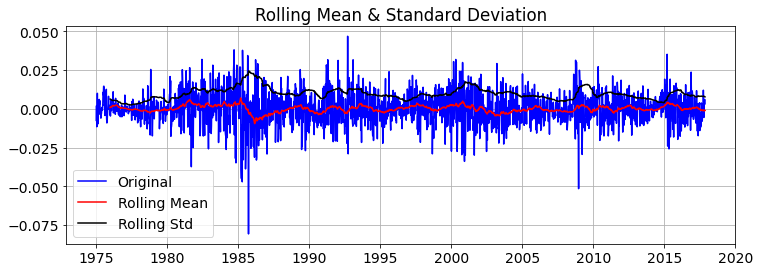

Results of Dickey-Fuller Test:
p_value:  0.0


In [25]:
test_stationarity(fxw.diff().dropna())

#### Motivating example to make data stationarity

In [26]:
pas=pd.read_csv('SeaPlaneTravel.csv', parse_dates=['Month'], index_col='Month')
pas.columns=['Passengers']
pas.head()

,Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


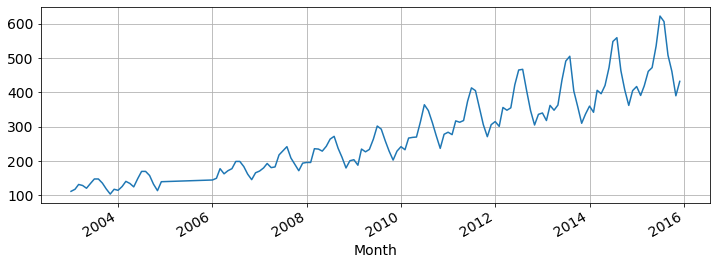

In [27]:
pas.Passengers.plot()
plt.show()

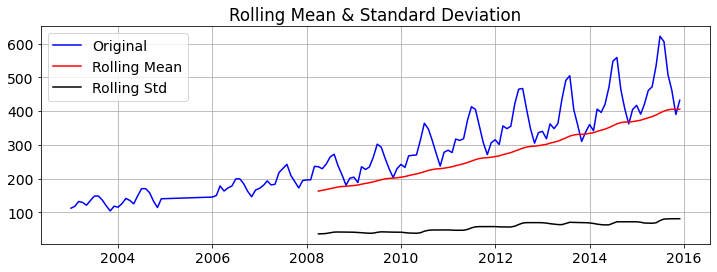

Results of Dickey-Fuller Test:
p_value:  0.991880243437641


In [28]:
test_stationarity(pas.Passengers)

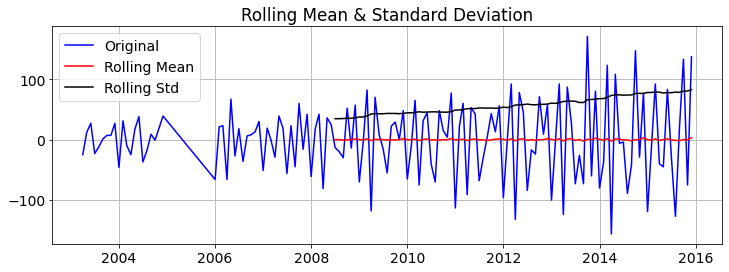

Results of Dickey-Fuller Test:
p_value:  5.079966883925475e-16


In [29]:
test_stationarity(pas.Passengers.diff().diff().diff().dropna())

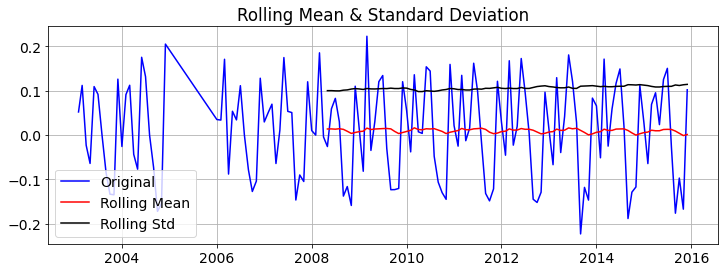

Results of Dickey-Fuller Test:
p_value:  0.0711205481508595


In [30]:
test_stationarity(np.log(pas.Passengers).diff().dropna())

---
---

# <font color = darkgreen>ARMA models
* __Requires the data to be Stationary__

### Auto Regressive AR Model

__AR(1)__

### \begin{equation*}V(today) =  Coeff*V(yesterday) + Constant/Mean + Noise \end{equation*}
### \begin{equation*}V(t) =  \gamma1*V(t-1) +  \mu +\epsilon \end{equation*}

* __If gamma_1 = 0 model is Mean plus noise__

__AR(2)__

### \begin{equation*}V(t) =  \gamma1*V(t-1) +  \gamma2*V(t-2) + \mu +\epsilon \end{equation*}
__AR(p)__

### \begin{equation*}V(t) =  \gamma1*V(t-1) +...........+  \gamma p*V(t-p) + \mu +\epsilon \end{equation*}

### Moving Average MA Model

__MA(1) Model__

### \begin{equation*}V(t) =  \theta1*\epsilon(t-1) + \mu + \epsilon(t) \end{equation*}

__MA(2) Model__

### \begin{equation*}V(t) = \theta1*\epsilon(t-1) + \theta2*\epsilon(t-2) +   \mu + \epsilon(t) \end{equation*}
__MA(q) Model__

### \begin{equation*}V(t) = \theta1*\epsilon(t-1) +................ +\theta q*\epsilon(t-q) +   \mu + \epsilon(t) \end{equation*}

### ARMA Model

#### ARMA(1,1)

### \begin{equation*}V(t) =  \gamma1*V(t-1) + \theta1*\epsilon(t-1) + \mu +  \epsilon(t) \end{equation*}

#### ARMA(1,2)

### \begin{equation*}V(t) = \gamma1*V(t-1) + \theta1*\epsilon(t-1) + \theta2*\epsilon(t-2)+ \mu + \epsilon(t) \end{equation*}

#### ARMA(2,1)

### \begin{equation*}V(t) = \gamma1*V(t-1) +  \gamma1*V(t-2)+ \theta1*\epsilon(t-1) + \mu + \epsilon(t) \end{equation*}

#### ARMA(p,q)

### \begin{equation*}V(t) =  \gamma1*V(t-1) +......+  \gamma p*V(t-p) + \theta1*\epsilon(t-1) +.......+\theta q*\epsilon(t-q) +  \mu + \epsilon(t) \end{equation*}

---

# ACF- PACF to determine lags the model (AR, MA, ARMA) and lags(p and q)

### Autocorrelation with previous lags

In [45]:
fxw_auto = pd.DataFrame(fxw, columns=['Value'])
fxw_auto['t-1'] = fxw_auto.Value.shift(1)
fxw_auto['t-2'] = fxw_auto.Value.shift(2)
fxw_auto['t-3'] = fxw_auto.Value.shift(3)
fxw_auto.head()

,Value,t-1,t-2,t-3
Date,,,,
1975-01-05,0.76090,NaN,NaN,NaN
1975-01-12,0.75346,0.76090,NaN,NaN
1975-01-19,0.75546,0.75346,0.76090,NaN
1975-01-26,0.74388,0.75546,0.75346,0.76090
1975-02-02,0.73902,0.74388,0.75546,0.75346


In [46]:
fxw_auto = fxw_auto.dropna()
fxw_auto.head()

,Value,t-1,t-2,t-3
Date,,,,
1975-01-26,0.74388,0.75546,0.75346,0.76090
1975-02-02,0.73902,0.74388,0.75546,0.75346
1975-02-09,0.74906,0.73902,0.74388,0.75546
1975-02-16,0.74142,0.74906,0.73902,0.74388
1975-02-23,0.73538,0.74142,0.74906,0.73902


In [47]:
fxw_auto.corr()

,Value,t-1,t-2,t-3
Value,1.000000,0.997665,0.994108,0.990445
t-1,0.997665,1.000000,0.997666,0.994110
t-2,0.994108,0.997666,1.000000,0.997666
t-3,0.990445,0.994110,0.997666,1.000000


### Partial Autocorrelation 
* removes the effect of previous lag while calculating correlations

In [34]:
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

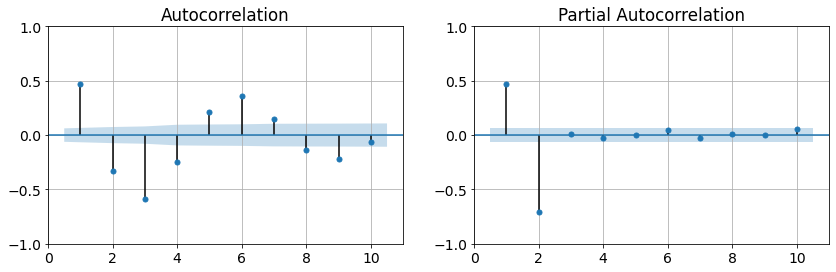

In [35]:
ar_coeffs = [1, -0.8, 0.7] # 1 is for the 0 lag term, this is always set to 1. The sign of coefficients is reverse
ma_coeffs = [1, 0]  # 1 is for the 0 lag term, this is always set to 1
y = arma_generate_sample(ar_coeffs, ma_coeffs, nsample=1000)
fig, ax = plt.subplots(1,2, figsize = (14,4))
plot_acf(y, lags=10, zero=False, ax=ax[0])
plot_pacf(y, lags=10, zero=False, ax=ax[1])
plt.show()

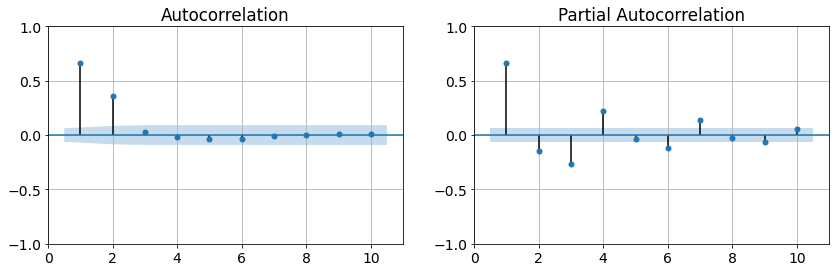

In [36]:
ar_coeffs = [1, 0] # 1 is for the 0 lag term, this is always set to 1. The sign of coefficients is reverse
ma_coeffs = [1, 0.8, 0.7]  # 1 is for the 0 lag term, this is always set to 1
y = arma_generate_sample(ar_coeffs, ma_coeffs, nsample=1000)
fig, ax = plt.subplots(1,2, figsize = (14,4))
plot_acf(y, lags=10, zero=False, ax=ax[0])
plot_pacf(y, lags=10, zero=False, ax=ax[1])
plt.show()

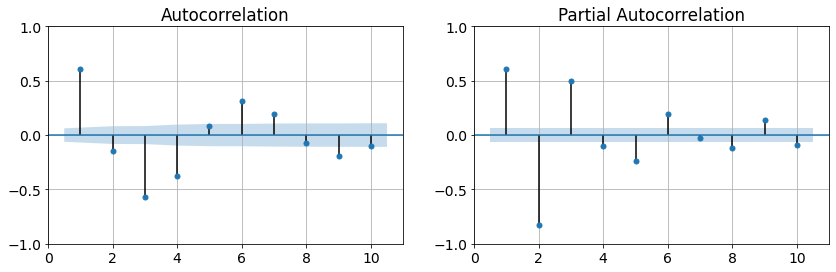

In [37]:
ar_coeffs = [1, -0.8, 0.7] # 1 is for the 0 lag term, this is always set to 1. The sign of coefficients is reverse
ma_coeffs = [1, 0.9, 0.7]  # 1 is for the 0 lag term, this is always set to 1
y = arma_generate_sample(ar_coeffs, ma_coeffs, nsample=1000)
fig, ax = plt.subplots(1,2, figsize = (14,4))
plot_acf(y, lags=10, zero=False, ax=ax[0])
plot_pacf(y, lags=10, zero=False, ax=ax[1])
plt.show()

## If the model is ARMA we have to try different models to find the right one

# Arima Model (p, d, q)
* ####  Integrates Stationarity
* ####  d is the number of times diff() has to be done to make the data stationary

In [38]:
!pip install pmdarima 
# conda install -c saravji pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.5 MB/s 
     |████████████████████████████████| 9.8 MB 14.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [38]:
import pmdarima as pm

In [39]:
pm.auto_arima(fxw)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [40]:
# Akaikan information coeff
# Bayesian Information coeff
pm.auto_arima(fxw, information_criterion='bic', trace=True)

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : BIC=-14161.451, Time=1.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=-14028.103, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=-14178.993, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=-14183.112, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=-14035.773, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=-14176.856, Time=0.93 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : BIC=-14176.889, Time=0.90 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : BIC=-14169.164, Time=1.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : BIC=-14190.797, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0]             : BIC=-14184.542, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0]             : BIC=-14184.575, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0]             : BIC=-14186.682, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : BIC=-14176.850, Time=0.40 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 7.496 seco

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

# ARIMA Model Implementation

In [41]:
from statsmodels.tsa.arima_model import ARIMA

In [49]:
import statsmodels.api as sm

In [42]:
fxw.head()

Date
1975-01-05    0.76090
1975-01-12    0.75346
1975-01-19    0.75546
1975-01-26    0.74388
1975-02-02    0.73902
Freq: W-SUN, Name: Value, dtype: float64

In [52]:
model = sm.tsa.arima.ARIMA(fxw, order=(0,1,1))
result_Arima = model.fit()

In [54]:
result_Arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                 2237
Model:                 ARIMA(0, 1, 1)   Log Likelihood                7103.111
Date:                Thu, 16 Jun 2022   AIC                         -14202.222
Time:                        03:36:28   BIC                         -14190.797
Sample:                    01-05-1975   HQIC                        -14198.051
                         - 11-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2755      0.015     18.107      0.000       0.246       0.305
sigma2         0.0001   2.03e-06     50.197      0.000    9.79e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               635.74
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

---

### Making Predictions from the fitted model

In [55]:
fxw.tail()

Date
2017-10-15    0.84628
2017-10-22    0.84798
2017-10-29    0.85326
2017-11-05    0.85936
2017-11-12    0.86260
Freq: W-SUN, Name: Value, dtype: float64

#### Forecast:
* Prediction into future
* Good Forecasts are only for next time period 

In [56]:
result_Arima.forecast()

2017-11-19    0.863121
Freq: W-SUN, dtype: float64

In [57]:
result_Arima.forecast(3)

2017-11-19    0.863121
2017-11-26    0.863121
2017-12-03    0.863121
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [58]:
result_Arima.forecast(3)[0]

0.8631212917754522

#### Predict:
* Makes predictions on the difference values

In [59]:
len(fxw)

2237

In [60]:
result_Arima.predict(2232, 2237)

2017-10-15    0.851939
2017-10-22    0.844721
2017-10-29    0.848878
2017-11-05    0.854467
2017-11-12    0.860708
2017-11-19    0.863121
Freq: W-SUN, Name: predicted_mean, dtype: float64

#### RMSE

In [63]:
Errors = result_Arima.resid
Errors.tail()

Date
2017-10-15   -0.005659
2017-10-22    0.003259
2017-10-29    0.004382
2017-11-05    0.004893
2017-11-12    0.001892
Freq: W-SUN, dtype: float64

In [64]:
np.sqrt(np.mean((Errors)**2))

0.018991872296142544

---

__Topics you can Explore further:__
* Arimax models
* Seasonal models of ARIMA: SARIMA
* LSTM and GRU models in Deep Learning (RNN)